[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/axr/blob/master/axr/01_bandits.ipynb)

# CliffWalking

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CliffWalking-v0")
n_states = env.observation_space.n
n_actions = env.action_space.n

print("Estados:", n_states)
print("Acciones:", n_actions)


Estados: 48
Acciones: 4


## Implementación incremental

In [3]:
def q_learning(env, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []

    for ep in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            if done:
                target = reward  # No hay estado futuro
            else:
                target = reward + gamma * np.max(Q[next_state])
            
            Q[state, action] += alpha * (target - Q[state, action])
            total_reward += reward
            state = next_state

        rewards.append(total_reward)
    return Q, rewards

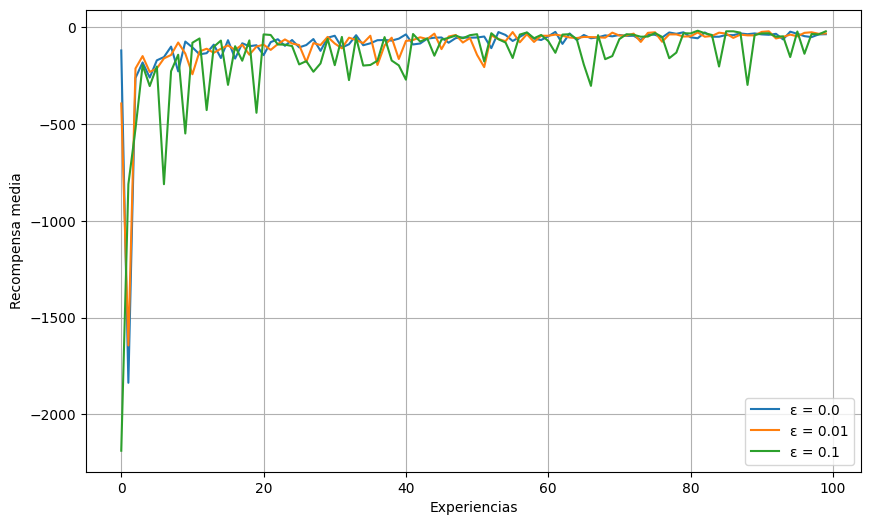

In [4]:
epsilons = [0.0, 0.01, 0.1]

# Ejecutar y graficar
plt.figure(figsize=(10, 6))

for eps in epsilons:
    Q, rewards = q_learning(env, episodes=100, epsilon=eps)
    plt.plot(rewards, label=f'ε = {eps}')

plt.xlabel('Experiencias')
plt.ylabel('Recompensa media')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import time

print("🎮 Entrenando agente...")
Q_trained, training_rewards = q_learning(env, episodes=500, epsilon=0.01)
# Agrega esta celda a tu notebook
import pygame

def play_with_pygame(env, Q, delay=0.5, cell_size=60):
    pygame.init()
    rows, cols = 4, 12
    width, height = cols * cell_size, rows * cell_size
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption("CliffWalking - Agente Q-Learning")
    font = pygame.font.SysFont(None, 32)
    
    colors = {
        "bg": (240, 240, 240),
        "cliff": (30, 30, 30),
        "start": (0, 200, 0),
        "goal": (200, 200, 0),
        "agent": (0, 120, 255),
        "grid": (180, 180, 180)
    }
    
    def draw_grid(agent_pos):
        screen.fill(colors["bg"])
        for r in range(rows):
            for c in range(cols):
                rect = pygame.Rect(c*cell_size, r*cell_size, cell_size, cell_size)
                if r == 3 and 1 <= c <= 10:
                    pygame.draw.rect(screen, colors["cliff"], rect)
                elif (r, c) == (3, 0):
                    pygame.draw.rect(screen, colors["start"], rect)
                elif (r, c) == (3, 11):
                    pygame.draw.rect(screen, colors["goal"], rect)
                pygame.draw.rect(screen, colors["grid"], rect, 1)
        # Dibuja el agente
        ar, ac = agent_pos // cols, agent_pos % cols
        agent_rect = pygame.Rect(ac*cell_size+8, ar*cell_size+8, cell_size-16, cell_size-16)
        pygame.draw.ellipse(screen, colors["agent"], agent_rect)
        pygame.display.flip()
    
    state, _ = env.reset()
    done = False
    clock = pygame.time.Clock()
    while not done:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return
        draw_grid(state)
        pygame.display.update()
        pygame.time.wait(int(delay*1000))
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = next_state
        clock.tick(60)
    # Mostrar pantalla final
    draw_grid(state)
    pygame.time.wait(1000)
    pygame.quit()

# USO:
play_with_pygame(env, Q_trained, delay=0.7)

🎮 Entrenando agente...
